In [1]:
import pandas as pd
import csv

In [2]:
import sklearn

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import csv
import random
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Loading Algorithm in model variable
#model = svm.SVC()
#model = Perceptron()
# model = KNeighborsClassifier(n_neighbors=3)
# model = GaussianNB()
# Read data in from file

In [25]:
#df=pd.read_csv("C:\\Users\\mtalib\\OneDrive - Youngstown State University\\Desktop\\bb.csv.csv")

<h2>Read data</h2>

In [29]:
filename = "data.csv"
df = pd.read_csv(filename)
df

,variances,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


<h2>Data analysis</h2>

Dataset stats: n          variances     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


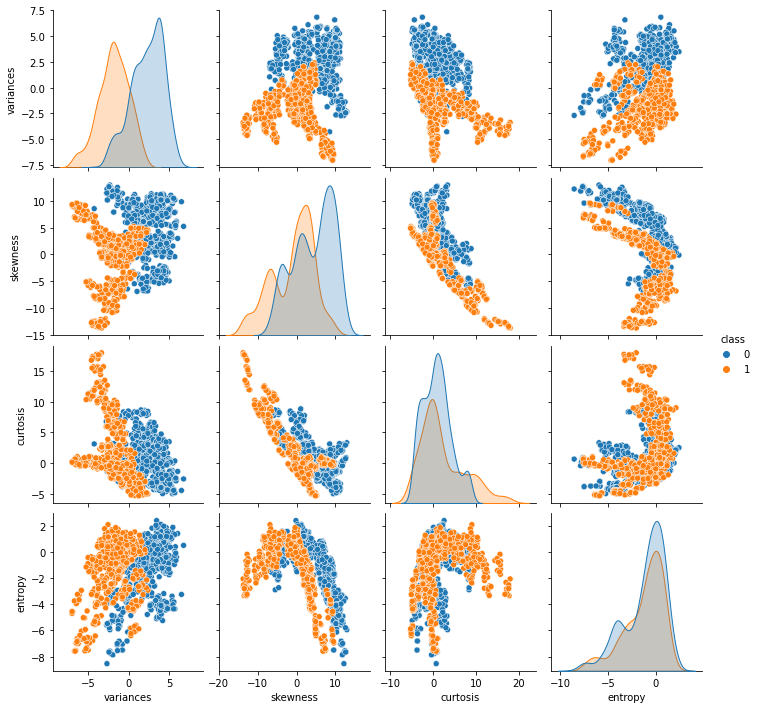

In [11]:
# Use pairplot and set the hue to be our class
sns.pairplot(df,hue='class') 
# Describe the data
print('Dataset stats: n', df.describe())

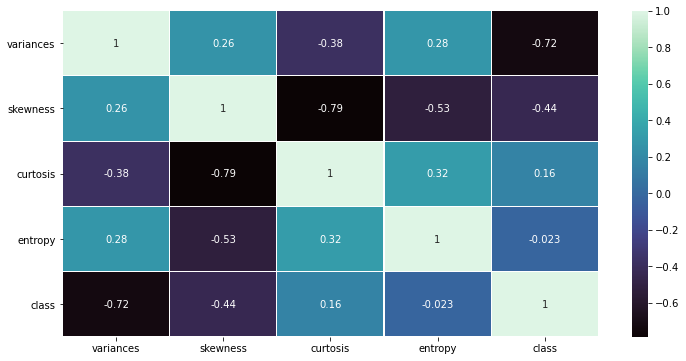

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='mako',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0.5, 6.79999999999999, 'Variance')

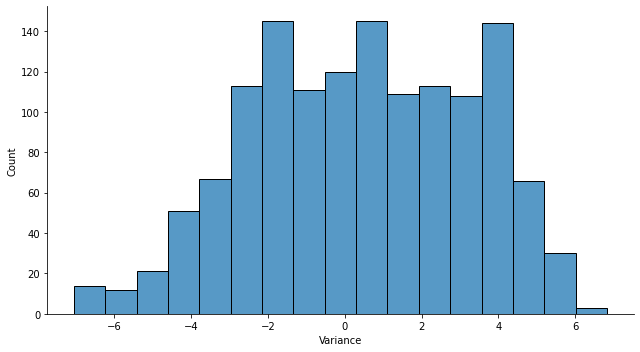

In [22]:
sns.displot(df["variances"], height= 5, aspect=1.8)
plt.xlabel("Variance")

Text(0.5, 6.79999999999999, 'Skewness')

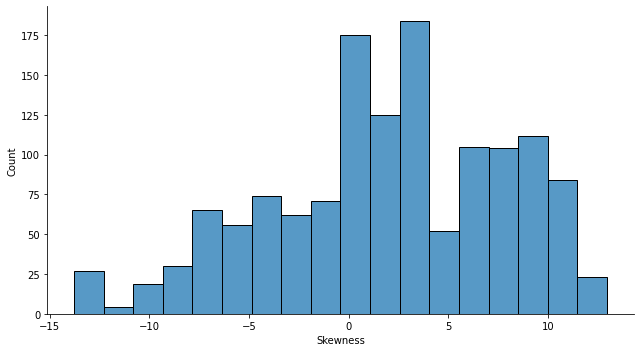

In [23]:
sns.displot(df["skewness"], height= 5, aspect=1.8)
plt.xlabel("Skewness")

Text(0.5, 6.79999999999999, 'Curtosis')

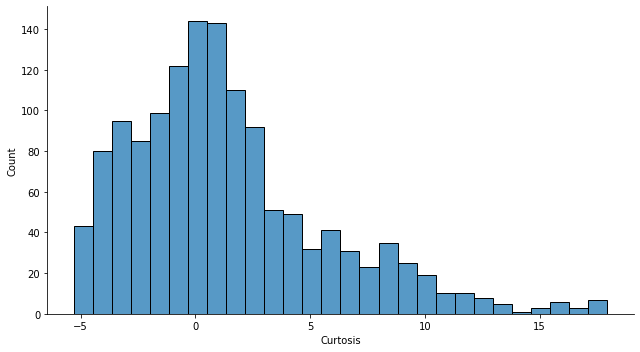

In [24]:
sns.displot(df["curtosis"], height= 5, aspect=1.8)
plt.xlabel("Curtosis")

Text(0.5, 6.79999999999999, 'Entropy')

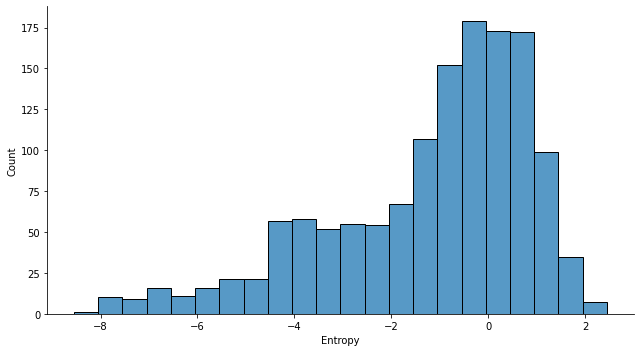

In [25]:
sns.displot(df["entropy"], height= 5, aspect=1.8)
plt.xlabel("Entropy")

Text(0.5, 0, 'Class')

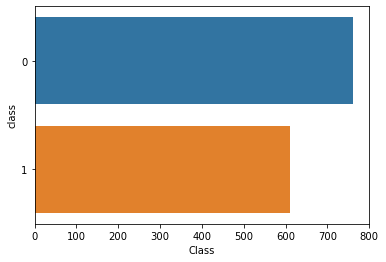

In [26]:
sns.countplot(data= df, y="class")
plt.xlabel("Class")

<h2>Train test split</h2>

In [136]:
from sklearn.model_selection import train_test_split
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333)

In [110]:
len(X_train), len(y_train), len(X_test), len(y_test)

(914, 914, 458, 458)

<h2>Experiment with Support Vector machine</h2>

In [111]:
model = svm.SVC()

In [112]:
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [113]:
cm = confusion_matrix(y_test, y_predicted)
acc = np.sum(np.equal(y_test, y_predicted)) / len(y_test)

Text(0.5, 1.0, 'Accuracy: 99.56%')

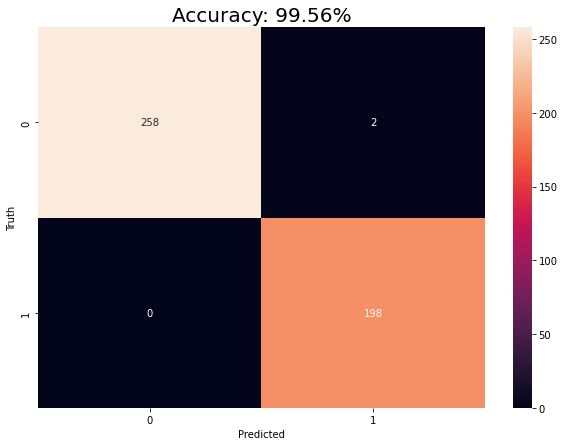

In [114]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Accuracy: {round(acc,4)*100}%", fontsize = 20)

<h2>Experiment with Artifical Neural Network</h2>

In [115]:
import tensorflow as tf

In [116]:
# determine the number of input features
n_features = X.shape[1]
# define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')


In [117]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))

In [118]:
# predict test set and convert to class label
ypred = model.predict(X_test)
y_predicted = (ypred > 0.5).flatten().astype(int)

15/15 [==============================] - 0s 2ms/step


In [119]:
cm = confusion_matrix(y_test, y_predicted)
acc = np.sum(np.equal(y_test, y_predicted)) / len(y_test)

Text(0.5, 1.0, 'Accuracy: 98.69%')

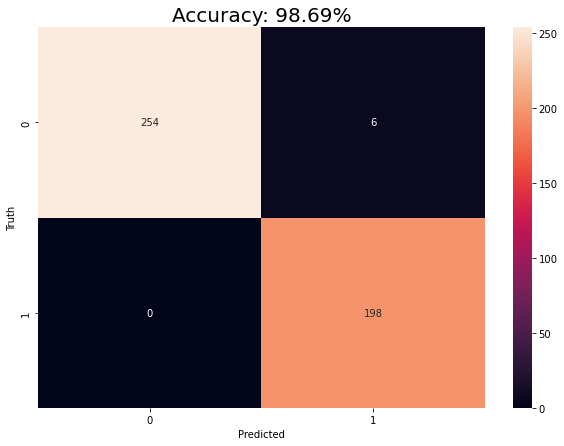

In [120]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Accuracy: {round(acc,4)*100}%", fontsize = 20)

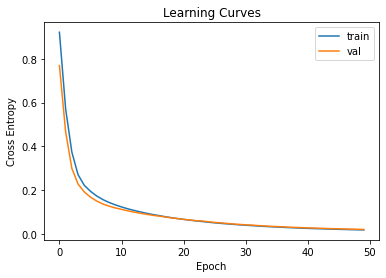

In [121]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

<h2>Experiment with Logistic Regression</h2>

In [122]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression() 

In [125]:
lr_model.fit(X_train, y_train)
y_predicted =  lr_model.predict(X_test) 

In [126]:
cm = confusion_matrix(y_test, y_predicted)
acc = np.sum(np.equal(y_test, y_predicted)) / len(y_test)

Text(0.5, 1.0, 'Accuracy: 98.25%')

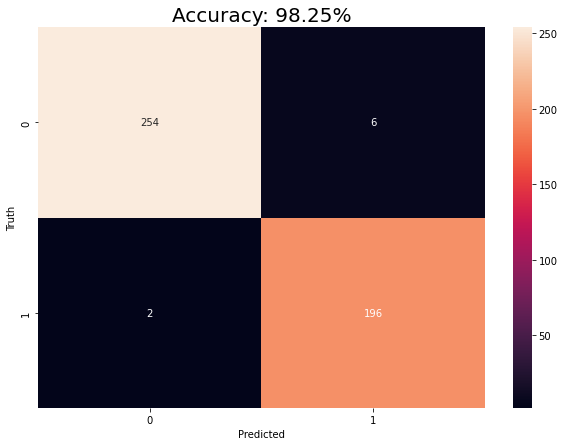

In [127]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Accuracy: {round(acc,4)*100}%", fontsize = 20)

<h2>Experiment with Random Forest</h2>

In [128]:
from sklearn.ensemble import RandomForestClassifier 
rfc_model= RandomForestClassifier(n_estimators=200, random_state=0)

In [129]:
rfc_model.fit(X_train, y_train)
y_predicted =  rfc_model.predict(X_test) 

In [130]:
cm = confusion_matrix(y_test, y_predicted)
acc = np.sum(np.equal(y_test, y_predicted)) / len(y_test)

Text(0.5, 1.0, 'Accuracy: 99.3%')

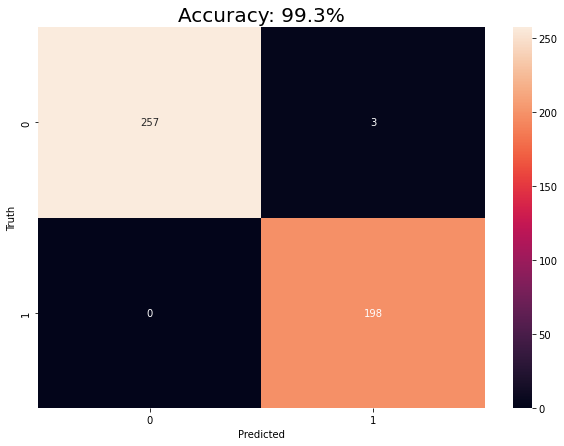

In [135]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f"Accuracy: {round(acc,3)*100}%", fontsize = 20)

<h2>End of the Experiment</h2>

In [52]:
# predict test set and convert to class label
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

15/15 [==============================] - 0s 1ms/step
Accuracy: 0.993


In [59]:
import matplotlib as mpl
import matplotlib.pyplot as pyplot

In [12]:
with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    data = []
    for row in reader:
        data.append({
            "feature": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4] == "0" else "Counterfeit"
        })

In [13]:
data

[{'feature': [3.6216, 8.6661, -2.8073, -0.44699], 'label': 'Authentic'},
 {'feature': [4.5459, 8.1674, -2.4586, -1.4621], 'label': 'Authentic'},
 {'feature': [3.866, -2.6383, 1.9242, 0.10645], 'label': 'Authentic'},
 {'feature': [3.4566, 9.5228, -4.0112, -3.5944], 'label': 'Authentic'},
 {'feature': [0.32924, -4.4552, 4.5718, -0.9888], 'label': 'Authentic'},
 {'feature': [4.3684, 9.6718, -3.9606, -3.1625], 'label': 'Authentic'},
 {'feature': [3.5912, 3.0129, 0.72888, 0.56421], 'label': 'Authentic'},
 {'feature': [2.0922, -6.81, 8.4636, -0.60216], 'label': 'Authentic'},
 {'feature': [3.2032, 5.7588, -0.75345, -0.61251], 'label': 'Authentic'},
 {'feature': [1.5356, 9.1772, -2.2718, -0.73535], 'label': 'Authentic'},
 {'feature': [1.2247, 8.7779, -2.2135, -0.80647], 'label': 'Authentic'},
 {'feature': [3.9899, -2.7066, 2.3946, 0.86291], 'label': 'Authentic'},
 {'feature': [1.8993, 7.6625, 0.15394, -3.1108], 'label': 'Authentic'},
 {'feature': [-1.5768, 10.843, 2.5462, -2.9362], 'label': 'A

In [17]:
holdout = int(0.40 * len(data))
random.shuffle(data)
testing = data[:holdout]
training = data[holdout:]
# Train model on training set
X_training = [row["feature"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)
# Make predictions on the testing set
X_testing = [row["feature"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1
# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")


Results for model SVC
Correct: 545
Incorrect: 3
Accuracy: 99.45%


In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv("C:\\Users\\mtalib\\OneDrive - Youngstown State University\\Desktop\\bb.csv.csv")

In [27]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install tensorflow 

  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached grpcio-1.50.0-cp38-cp38-win_amd64.whl (3.7 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-non

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\importlib_metadata-3.10.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [1]:
pip install --user <package_name>

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [3]:
pip install --user tensorflow

  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.50.0-cp38-cp38-win_amd64.whl (3.7 MB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-non

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
#Neural Network

15/15 [==============================] - 0s 1ms/step
Accuracy: 0.971


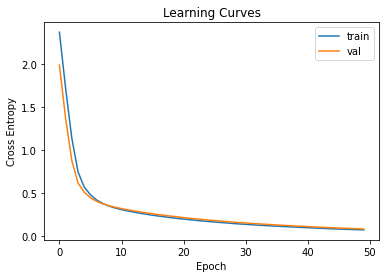

In [61]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test,y_test))
# predict test set and convert to class label
ypred = model.predict(X_test)
yhat = (ypred > 0.5).flatten().astype(int) 
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [28]:
df.describe()

,variances,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


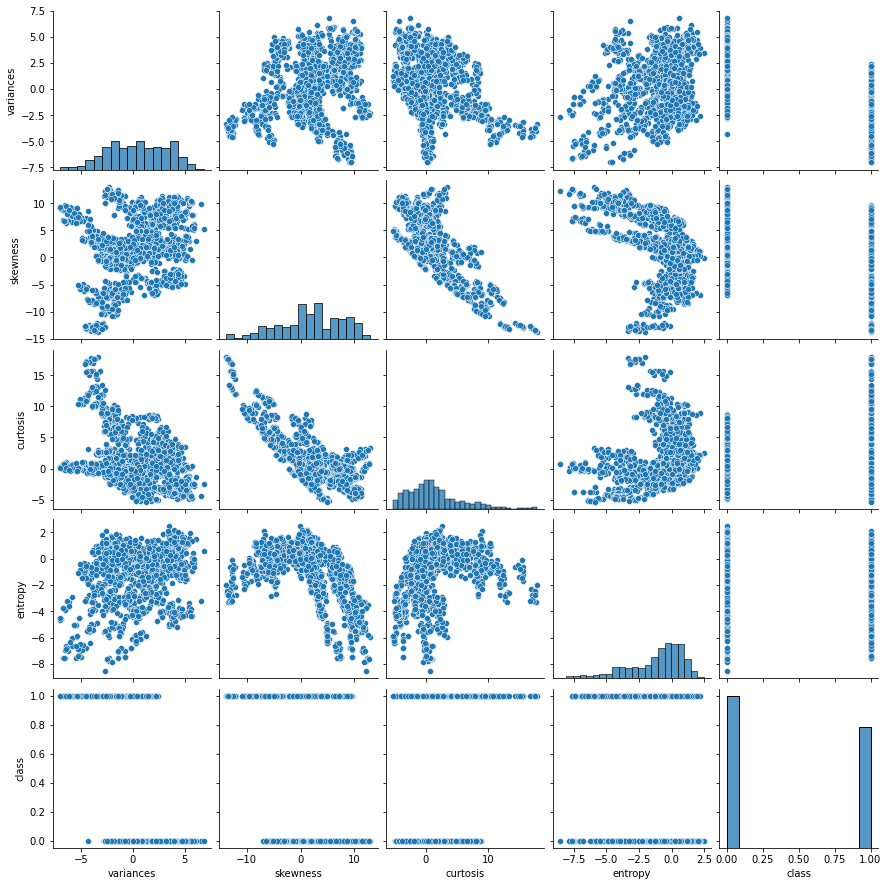

In [29]:
sns.pairplot(df)

In [30]:
dataset_features = df.iloc[:, 0:4].values 

dataset_labels = df.iloc[:, 4].values 

In [32]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21) 

In [33]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0) 

rfc_object.fit(train_features, train_labels) 

RandomForestClassifier(n_estimators=200, random_state=0)

In [36]:
predicted_labels = rfc_object.predict(test_features) 

In [ ]:
#Random forest algorithms

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[152   1]
 [  0 122]]
0.9963636363636363


In [ ]:
#Support Vector Machine

In [38]:
from sklearn.svm import SVC as svc

svc_object = svc(kernel='poly', degree=8) 

svc_object.fit(train_features, train_labels)

predicted_labels = svc_object.predict(test_features) 

In [39]:
print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels))  

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       153
           1       0.71      1.00      0.83       122

    accuracy                           0.81       275
   macro avg       0.85      0.83      0.81       275
weighted avg       0.87      0.81      0.81       275

[[102  51]
 [  0 122]]
0.8145454545454546


In [ ]:
#Logistics Regression

In [41]:
from sklearn.linear_model import LogisticRegression

lr_object = LogisticRegression() 

lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)  

#The following script evaluates the linear regression model:

print(classification_report(test_labels, predicted_labels)) 

print(confusion_matrix(test_labels, predicted_labels)) 

print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[150   3]
 [  1 121]]
0.9854545454545455
